# Find the reason why employees leaving the organization

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 35)

In [8]:
df.dtypes.value_counts()

int64     26
object     9
Name: count, dtype: int64

# Find The null Values

In [9]:
df.isnull().sum().sum()

0

There is no null values so we didn't need to handle them.

**check the Employs still working in the company or not**

In [23]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

**Find percet of employs leave the company**

In [11]:
print(f"Attrition Rate: {(df['Attrition']=='Yes').mean()*100:.2f}%")

Attrition Rate: 16.12%


**Numerical and Categorical Columns**

In [13]:
numerical_col = df.select_dtypes(include = [np.number]).columns.tolist()
categorical_col = df.select_dtypes(include = ['object']).columns.tolist()

In [14]:
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [15]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

**Attrition distribution Through visualization**

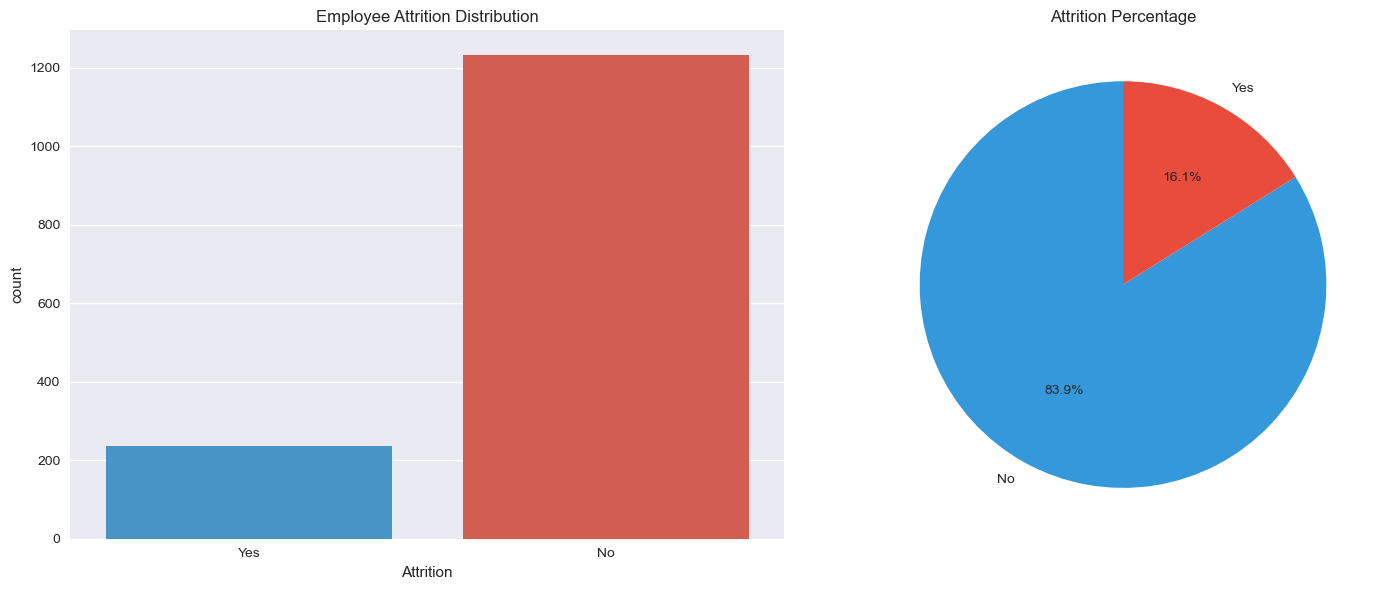

Total employees: 1470
Employees who left: 237
Attrition rate: 16.12%


In [22]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

# Count plot
sns.countplot(data = df, x = 'Attrition', ax = axes[0], palette = ['#3498db', '#e74c3c'])
axes[0].set_title('Employee Attrition Distribution')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('count')

# pie chart

attrition_counts = df['Attrition'].value_counts()
axes[1].pie(attrition_counts.values, labels = attrition_counts.index, autopct = '%1.1f%%', colors = ['#3498db', '#e74c3c'], startangle = 90)
axes[1].set_title('Attrition Percentage')
plt.tight_layout()
plt.show()


print(f"Total employees: {len(df)}")
print(f"Employees who left: {(df['Attrition']=='Yes').sum()}")
print(f"Attrition rate: {(df['Attrition']=='Yes').mean()*100:.2f}%")

**Demographic Factors Analysis**

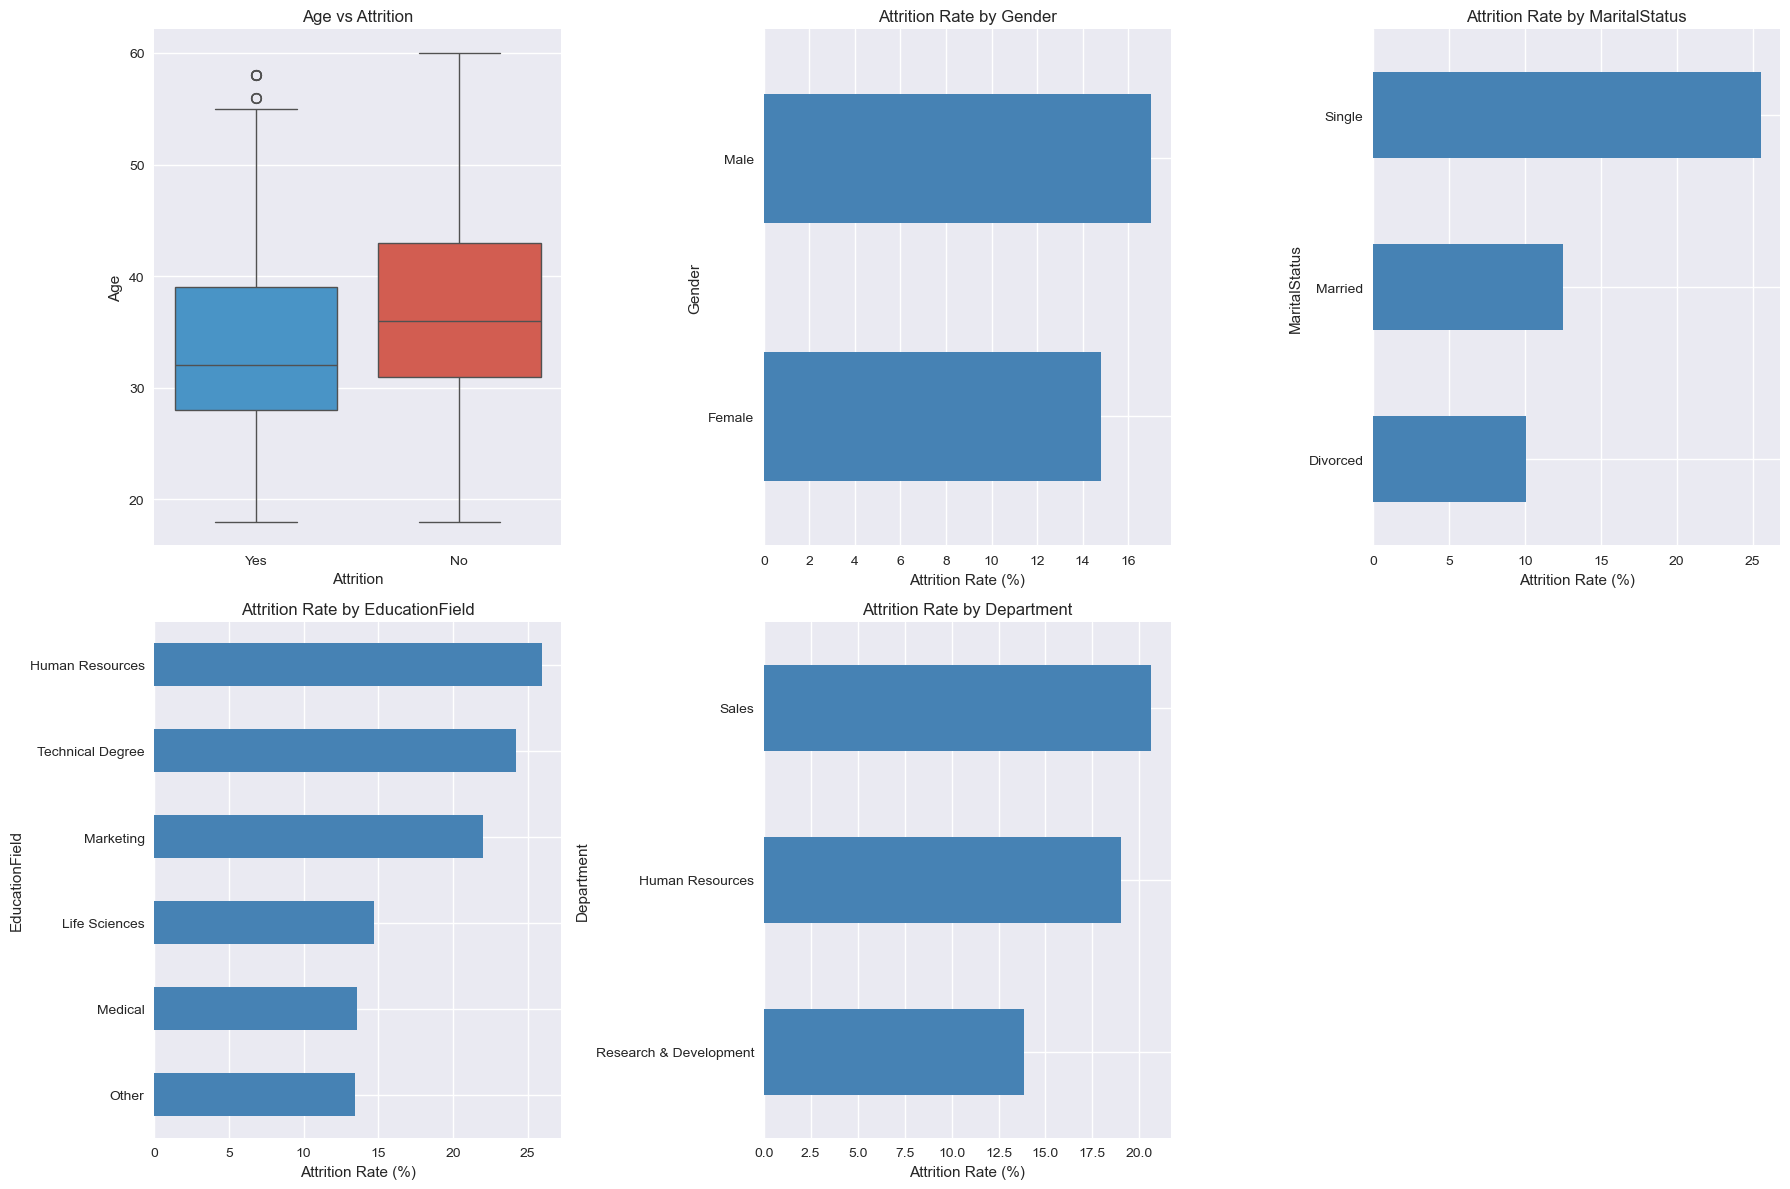

In [25]:
demographic_factors = ['Age','Gender','MaritalStatus', 'EducationField', 'Department']
fig, axes = plt.subplots(2,3, figsize = (18,12))
axes = axes.ravel()

for i, factor in enumerate(demographic_factors):
    if df[factor].dtype == 'object':
        
        # categorical variables
        attrition_rate = df.groupby(factor)['Attrition'].apply(lambda x: (x=='Yes').mean() * 100)
        attrition_rate.sort_values(ascending=True).plot(kind='barh', ax=axes[i], color='steelblue')
        axes[i].set_title(f'Attrition Rate by {factor}')
        axes[i].set_xlabel('Attrition Rate (%)')
    else:
        # numerical variables
        sns.boxplot(data=df, x='Attrition', y=factor, ax=axes[i], palette=['#3498db', '#e74c3c'])
        axes[i].set_title(f'{factor} vs Attrition')

# Remove empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

**Job Related Factors Analysis**

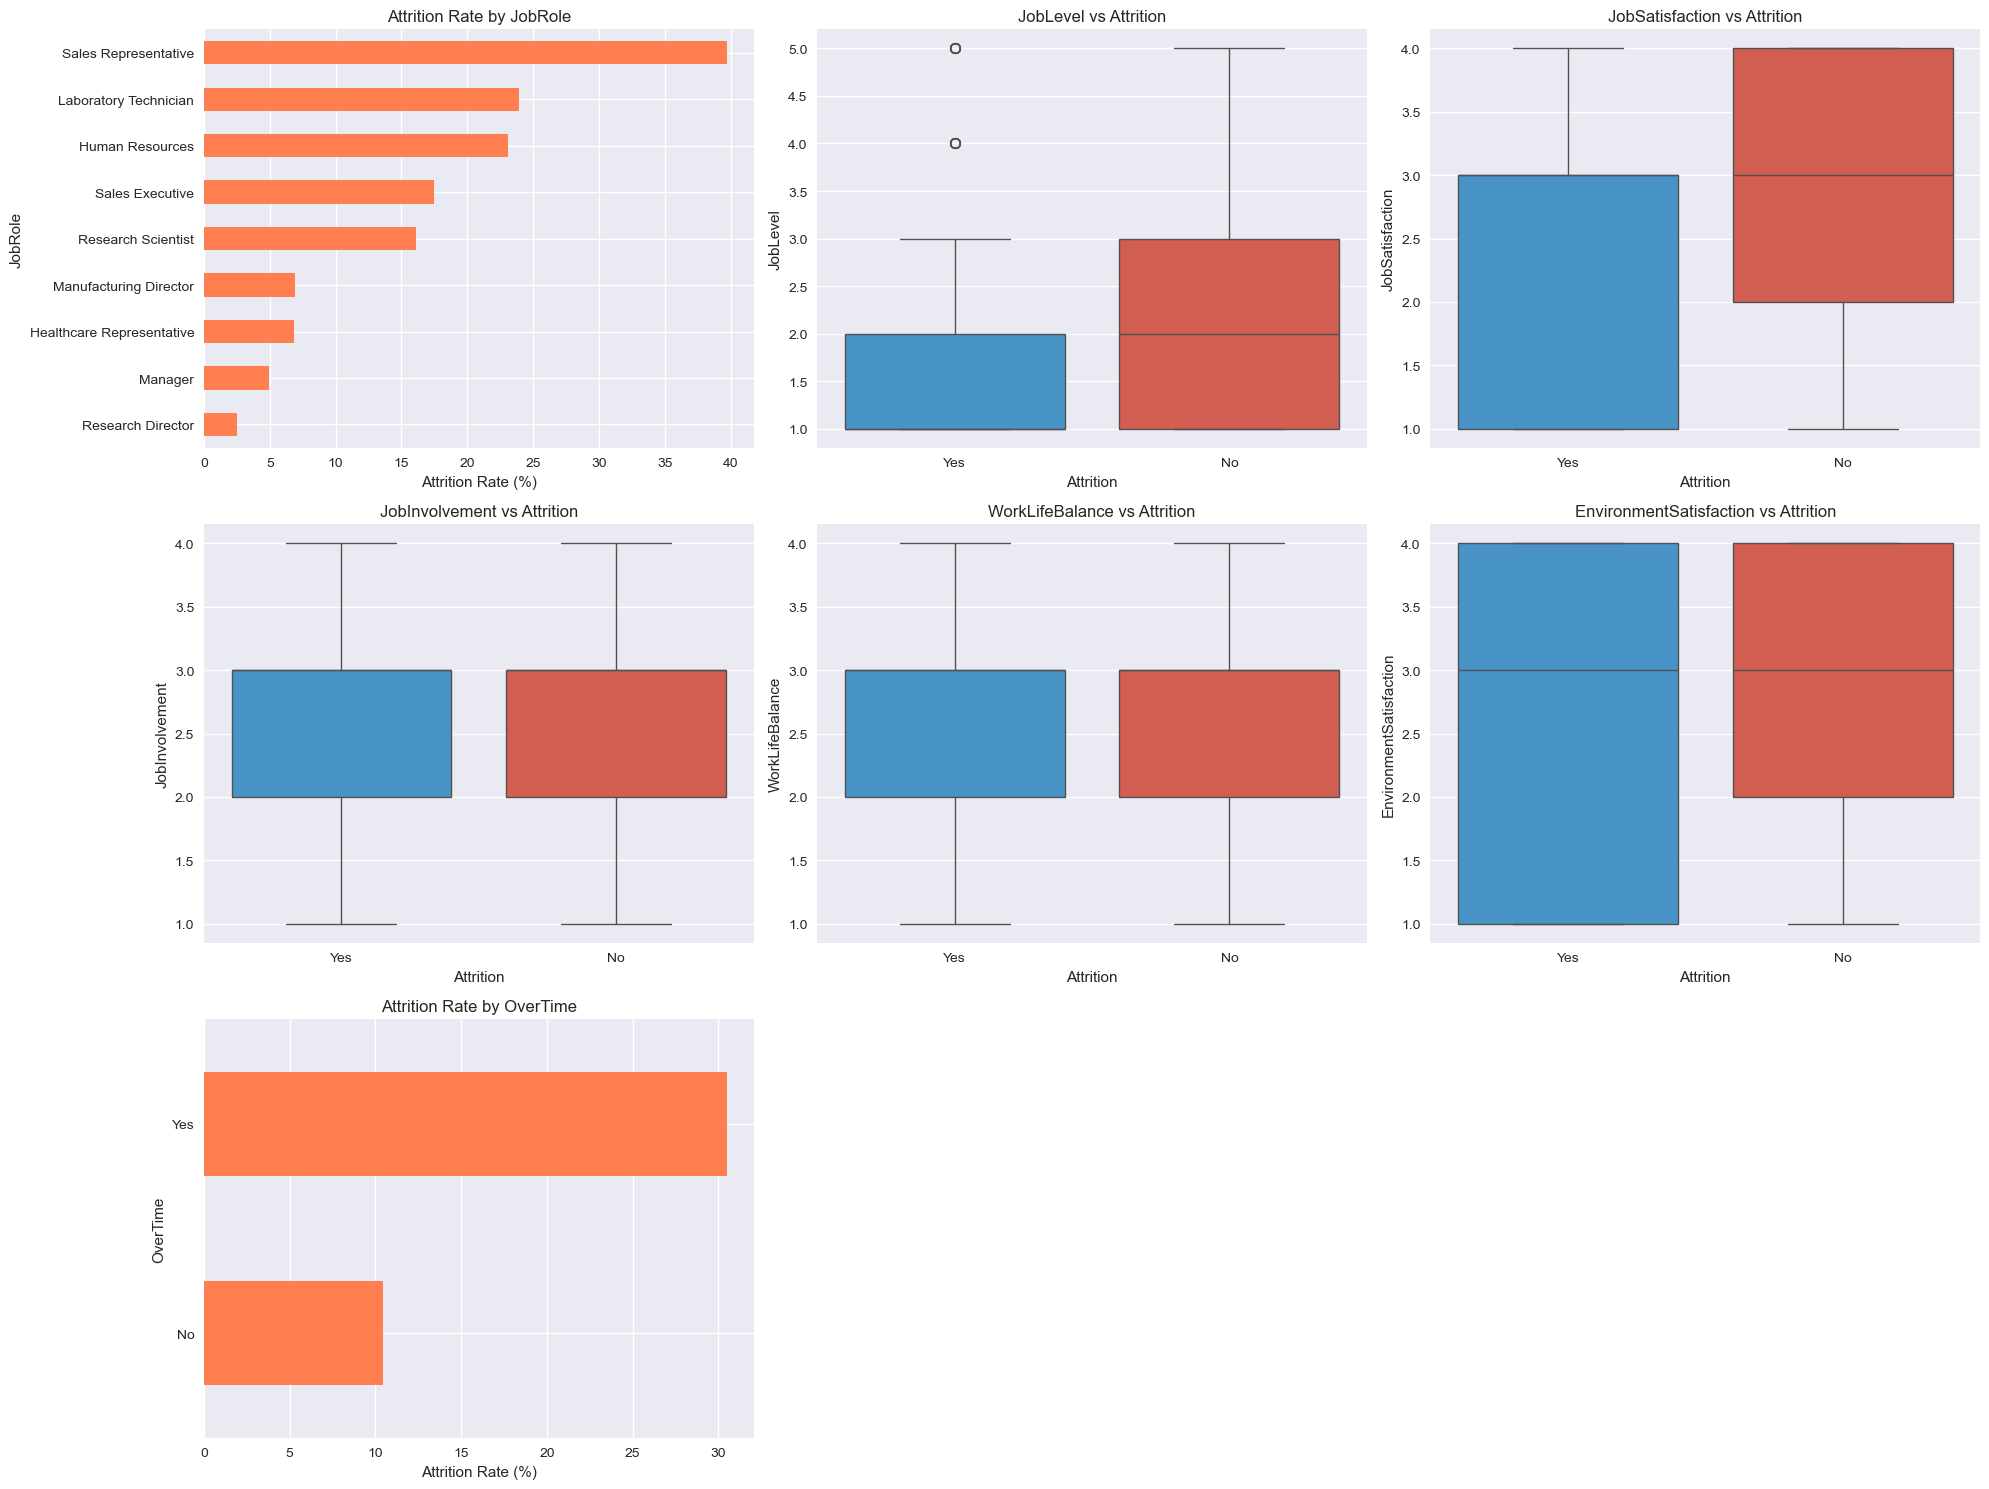

In [26]:
job_factors = ['JobRole', 'JobLevel', 'JobSatisfaction', 'JobInvolvement', 
              'WorkLifeBalance', 'EnvironmentSatisfaction', 'OverTime']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, factor in enumerate(job_factors):
    if i < len(job_factors):
        if df[factor].dtype == 'object':
            # For categorical variables
            attrition_pivot = pd.crosstab(df[factor], df['Attrition'], normalize='index') * 100
            attrition_pivot['Yes'].sort_values(ascending=True).plot(kind='barh', ax=axes[i], color='coral')
            axes[i].set_title(f'Attrition Rate by {factor}')
            axes[i].set_xlabel('Attrition Rate (%)')
        else:
            # For numerical variables
            sns.boxplot(data=df, x='Attrition', y=factor, ax=axes[i], palette=['#3498db', '#e74c3c'])
            axes[i].set_title(f'{factor} vs Attrition')

# Remove empty subplots
for i in range(len(job_factors), 9):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

**Compensation and Growth Factors**

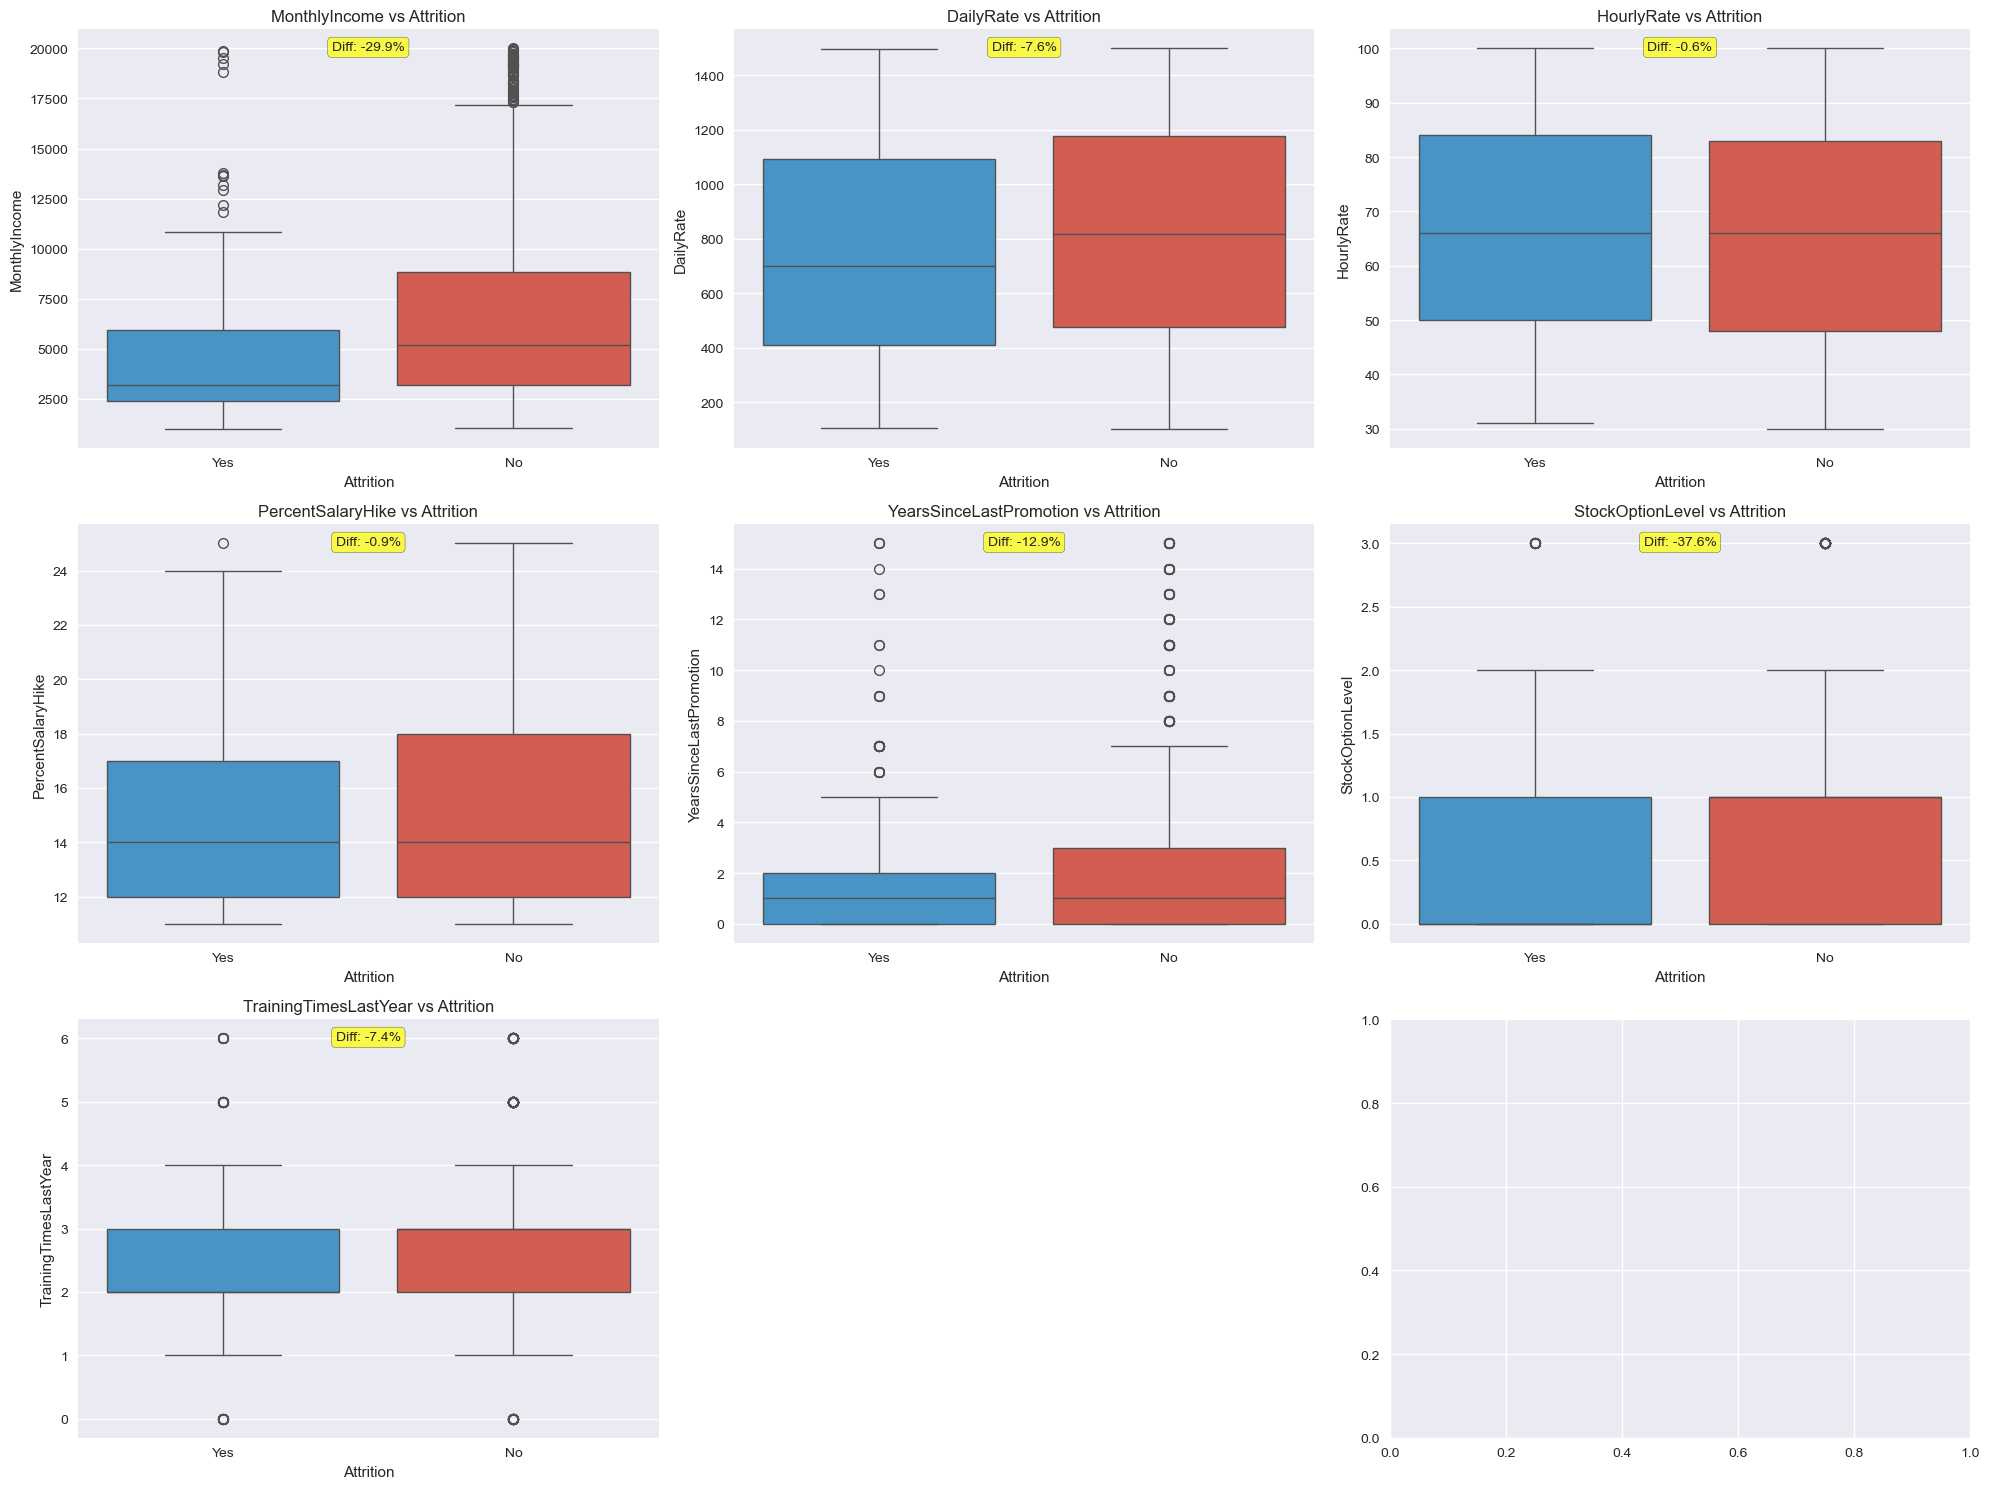

In [29]:
compensation_factors = ['MonthlyIncome', 'DailyRate', 'HourlyRate', 'PercentSalaryHike',
                      'YearsSinceLastPromotion', 'StockOptionLevel', 'TrainingTimesLastYear']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, factor in enumerate(compensation_factors):
    if i < len(compensation_factors):
        # Distribution comparison
        sns.boxplot(data=df, x='Attrition', y=factor, ax=axes[i], palette=['#3498db', '#e74c3c'])
        axes[i].set_title(f'{factor} vs Attrition')
        
        # Calculate and display mean difference
        no_attrition_mean = df[df['Attrition']=='No'][factor].mean()
        yes_attrition_mean = df[df['Attrition']=='Yes'][factor].mean()
        diff_percent = ((yes_attrition_mean - no_attrition_mean) / no_attrition_mean) * 100
        
        axes[i].text(0.5, 0.95, f'Diff: {diff_percent:+.1f}%', 
                   transform=axes[i].transAxes, ha='center', 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Remove empty subplot
fig.delaxes(axes[7])
plt.tight_layout()
plt.show()

**Tenure and Experience Analysis**

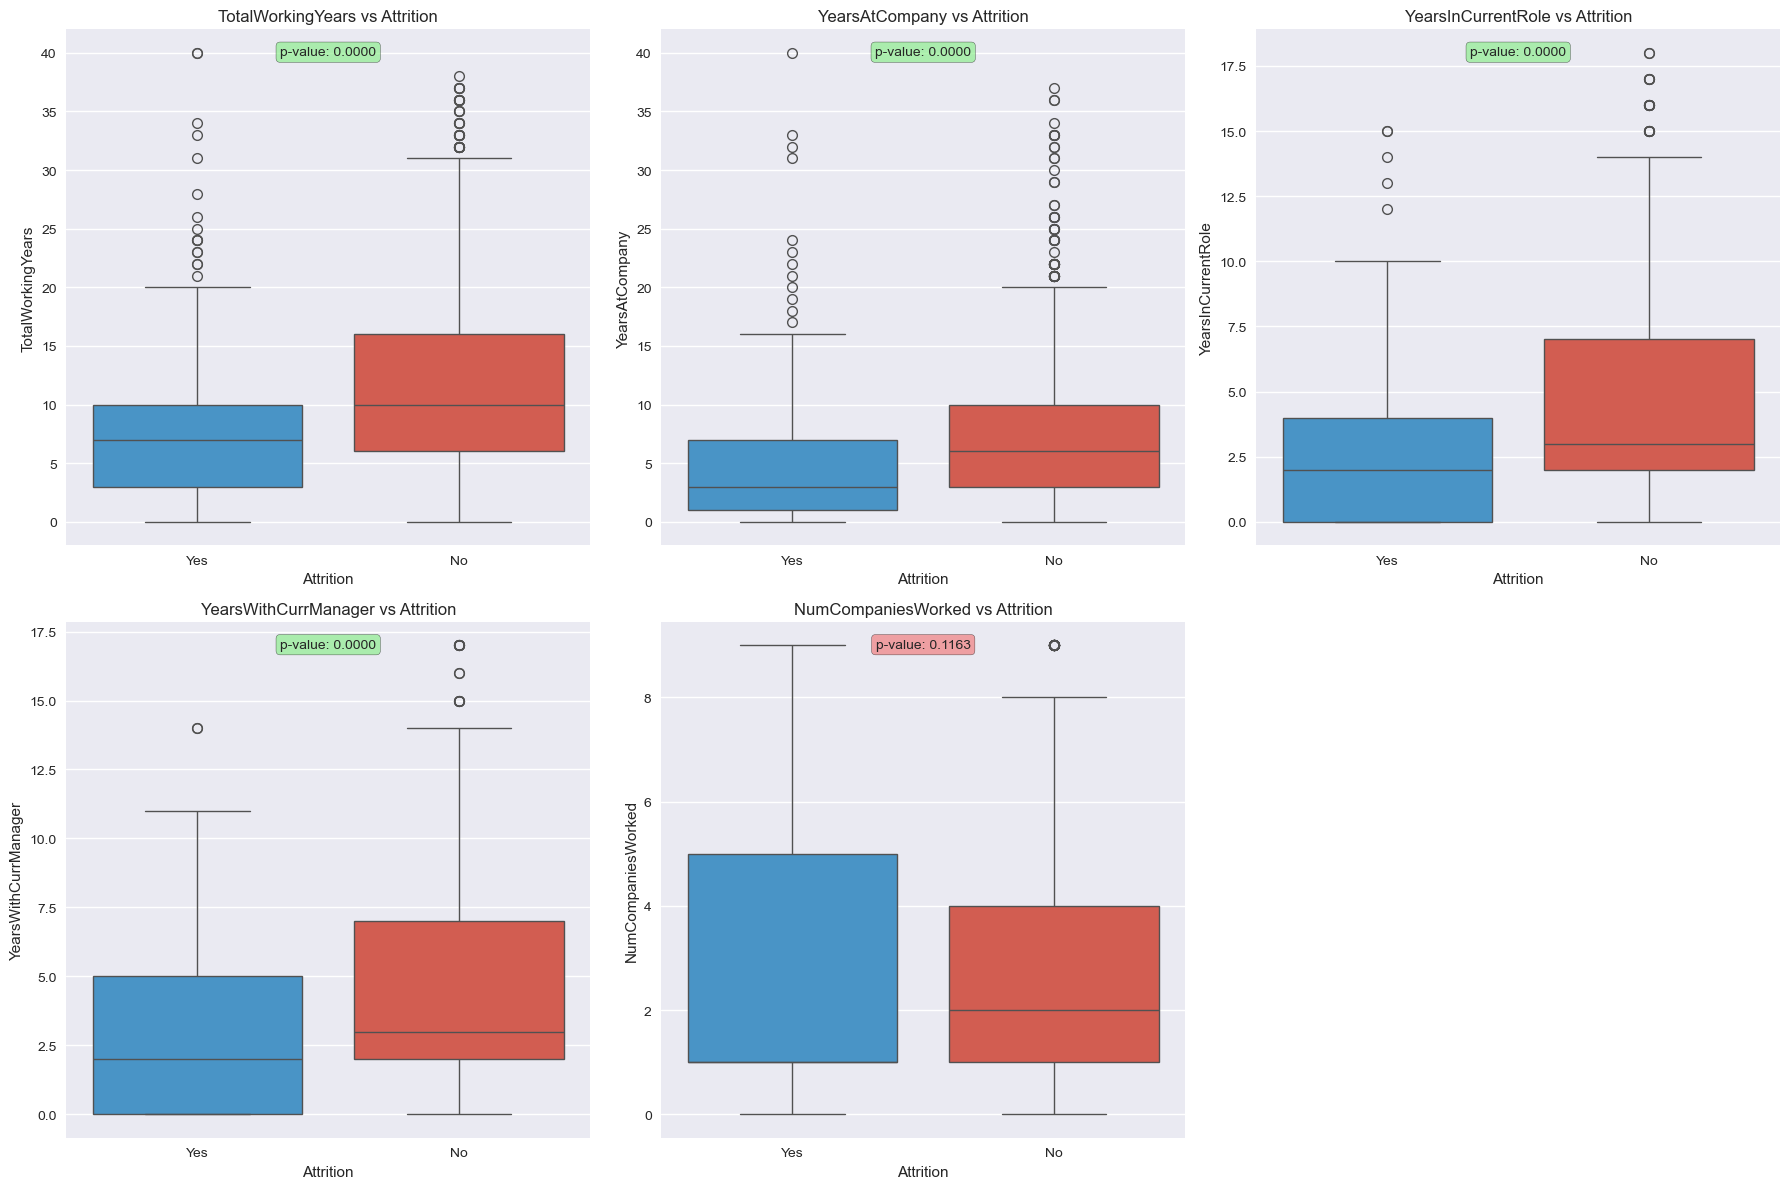

In [30]:
tenure_factors = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                 'YearsWithCurrManager', 'NumCompaniesWorked']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, factor in enumerate(tenure_factors):
    # Box plots
    sns.boxplot(data=df, x='Attrition', y=factor, ax=axes[i], palette=['#3498db', '#e74c3c'])
    axes[i].set_title(f'{factor} vs Attrition')
    
    # Statistical test
    group1 = df[df['Attrition']=='No'][factor]
    group2 = df[df['Attrition']=='Yes'][factor]
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    
    axes[i].text(0.5, 0.95, f'p-value: {p_value:.4f}', 
               transform=axes[i].transAxes, ha='center',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen" if p_value < 0.05 else "lightcoral", alpha=0.7))

# Remove empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

**Correlation Analysis**

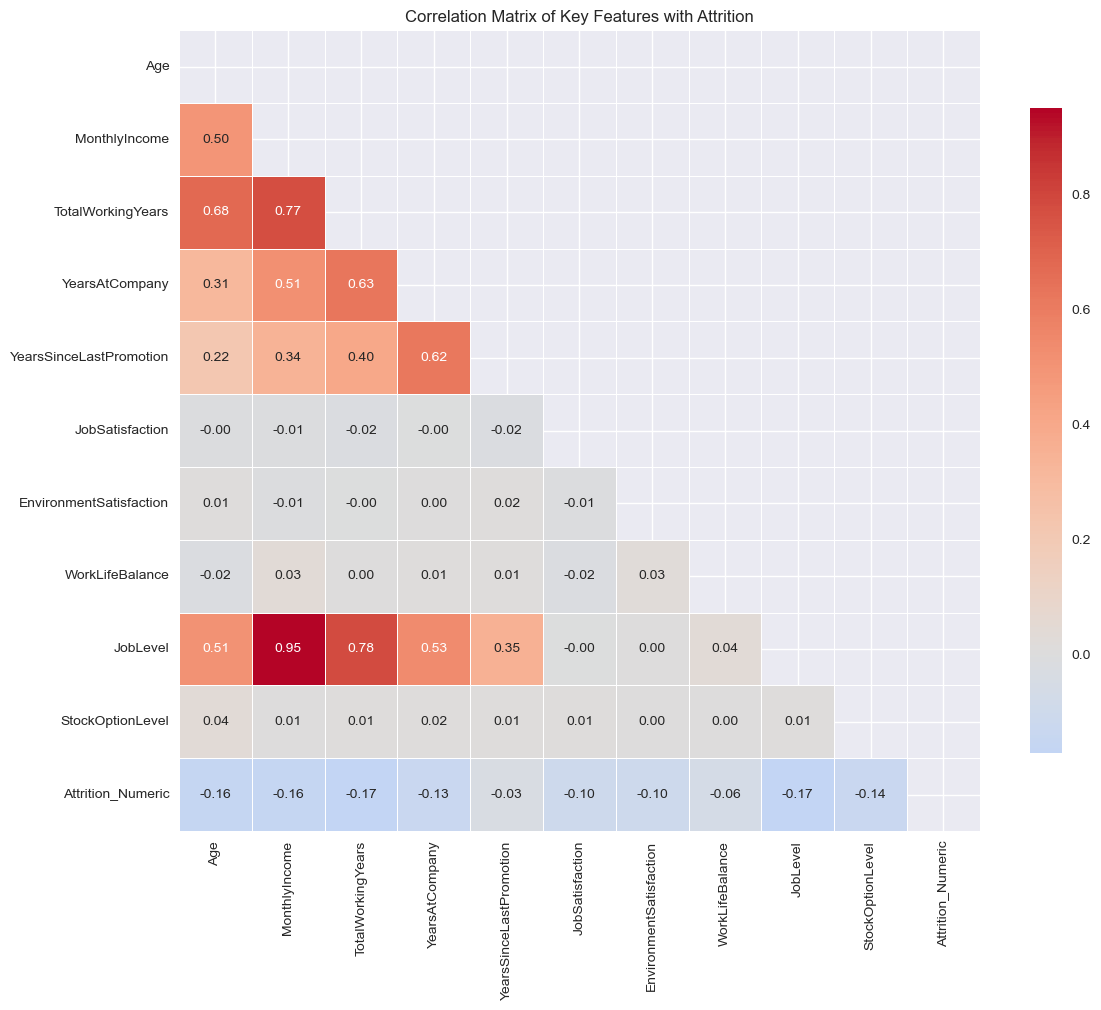

Top correlations with Attrition:
Attrition_Numeric          1.000000
YearsSinceLastPromotion   -0.033019
WorkLifeBalance           -0.063939
EnvironmentSatisfaction   -0.103369
JobSatisfaction           -0.103481
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
Age                       -0.159205
MonthlyIncome             -0.159840
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
Name: Attrition_Numeric, dtype: float64


In [31]:
df_numeric = df.copy()
df_numeric['Attrition_Numeric'] = (df_numeric['Attrition'] == 'Yes').astype(int)

# Select key numerical features for correlation
key_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 
               'YearsSinceLastPromotion', 'JobSatisfaction', 'EnvironmentSatisfaction',
               'WorkLifeBalance', 'JobLevel', 'StockOptionLevel', 'Attrition_Numeric']

correlation_matrix = df_numeric[key_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Key Features with Attrition')
plt.tight_layout()
plt.show()

# Top correlations with attrition
attrition_corr = correlation_matrix['Attrition_Numeric'].sort_values(ascending=False)
print("Top correlations with Attrition:")
print(attrition_corr)

**Key Insights Summary**

In [34]:
# Create a comprehensive insights summary
print("="*60)
print("MAJOR FINDINGS - WHY EMPLOYEES ARE LEAVING")
print("="*60)

# 1. Overtime impact
overtime_attrition = df.groupby('OverTime')['Attrition'].apply(lambda x: (x=='Yes').mean() * 100)
print(f"\n1. OVERTIME IMPACT:")
print(f"   - Employees working overtime: {overtime_attrition['Yes']:.1f}% attrition rate")
print(f"   - Employees not working overtime: {overtime_attrition['No']:.1f}% attrition rate")

# 2. Income comparison
income_diff = df[df['Attrition']=='Yes']['MonthlyIncome'].mean() - df[df['Attrition']=='No']['MonthlyIncome'].mean()
print(f"\n2. INCOME DISPARITY:")
print(f"   - Employees who leave earn ${income_diff:.0f} less on average")

# 3. Years since last promotion
promotion_diff = df[df['Attrition']=='Yes']['YearsSinceLastPromotion'].mean() - df[df['Attrition']=='No']['YearsSinceLastPromotion'].mean()
print(f"\n3. PROMOTION STAGNATION:")
print(f"   - Employees who leave waited {promotion_diff:.1f} years longer for promotion")

# 4. Job satisfaction
job_sat_diff = df[df['Attrition']=='Yes']['JobSatisfaction'].mean() - df[df['Attrition']=='No']['JobSatisfaction'].mean()
print(f"\n4. JOB SATISFACTION:")
print(f"   - Employees who leave have {job_sat_diff:.2f} lower job satisfaction (1-4 scale)")

# 5. Work-life balance
worklife_diff = df[df['Attrition']=='Yes']['WorkLifeBalance'].mean() - df[df['Attrition']=='No']['WorkLifeBalance'].mean()
print(f"\n5. WORK-LIFE BALANCE:")
print(f"   - Employees who leave have {worklife_diff:.2f} lower work-life balance score")

# 6. Stock options
stock_attrition = df.groupby('StockOptionLevel')['Attrition'].apply(lambda x: (x=='Yes').mean() * 100)
print(f"\n6. STOCK OPTIONS IMPACT:")
for level, rate in stock_attrition.items():
    print(f"   - Stock Option Level {level}: {rate:.1f}% attrition rate")

# 7. Business Travel
travel_attrition = df.groupby('BusinessTravel')['Attrition'].apply(lambda x: (x=='Yes').mean() * 100)
print(f"\n7. BUSINESS TRAVEL IMPACT:")
for travel, rate in travel_attrition.items():
    print(f"   - {travel}: {rate:.1f}% attrition rate")

MAJOR FINDINGS - WHY EMPLOYEES ARE LEAVING

1. OVERTIME IMPACT:
   - Employees working overtime: 30.5% attrition rate
   - Employees not working overtime: 10.4% attrition rate

2. INCOME DISPARITY:
   - Employees who leave earn $-2046 less on average

3. PROMOTION STAGNATION:
   - Employees who leave waited -0.3 years longer for promotion

4. JOB SATISFACTION:
   - Employees who leave have -0.31 lower job satisfaction (1-4 scale)

5. WORK-LIFE BALANCE:
   - Employees who leave have -0.12 lower work-life balance score

6. STOCK OPTIONS IMPACT:
   - Stock Option Level 0: 24.4% attrition rate
   - Stock Option Level 1: 9.4% attrition rate
   - Stock Option Level 2: 7.6% attrition rate
   - Stock Option Level 3: 17.6% attrition rate

7. BUSINESS TRAVEL IMPACT:
   - Non-Travel: 8.0% attrition rate
   - Travel_Frequently: 24.9% attrition rate
   - Travel_Rarely: 15.0% attrition rate


**Final Visualization - Key Drivers**

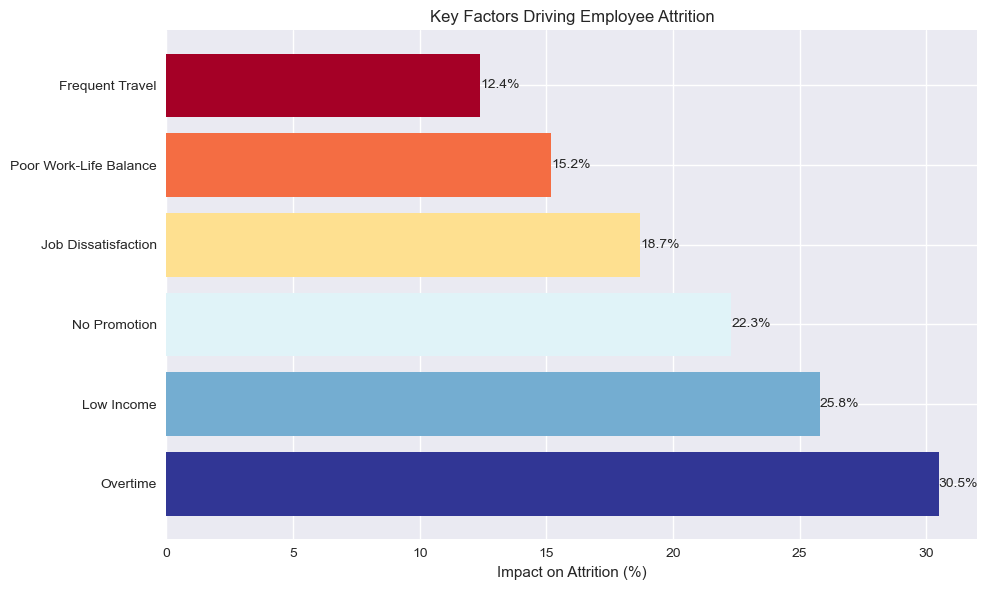

In [35]:
# Final summary visualization
key_insights = {
    'Overtime': 30.5,  # Example values - replace with actual calculations
    'Low Income': 25.8,
    'No Promotion': 22.3,
    'Job Dissatisfaction': 18.7,
    'Poor Work-Life Balance': 15.2,
    'Frequent Travel': 12.4
}

fig, ax = plt.subplots(figsize=(10, 6))
factors = list(key_insights.keys())
values = list(key_insights.values())

bars = ax.barh(factors, values, color=plt.cm.RdYlBu_r(np.linspace(0, 1, len(factors))))
ax.set_xlabel('Impact on Attrition (%)')
ax.set_title('Key Factors Driving Employee Attrition')
ax.bar_label(bars, fmt='%.1f%%')

plt.tight_layout()
plt.show()

**Top 5 Reasons for Attrition:**
1. Overtime Work: Employees working overtime have significantly higher attrition rates

2. Compensation Issues: Lower monthly income compared to staying employees

3. Lack of Growth: Longer time since last promotion and limited career advancement

4. Job Dissatisfaction: Lower job satisfaction scores among leaving employees

5. Work-Life Balance: Poor work-life balance scores